In [1]:
import numpy as np
import pandas as pd
import os


# for everything else
import matplotlib.pyplot as plt
from random import randint
import pickle

from PIL import Image


In [2]:
path_test = "tiny-imagenet-200/test/images"
list_test = os.listdir(path_test)

In [3]:
from PIL import Image
import glob
image_list = []
for filename in list_test:
    if filename.endswith("JPEG"):
        im = Image.open(path_test + "/" + filename).convert('RGB').resize((150, 150))
        image_list.append(np.array(im))

x = np.array(image_list)
X_test = x

In [4]:
import sys
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

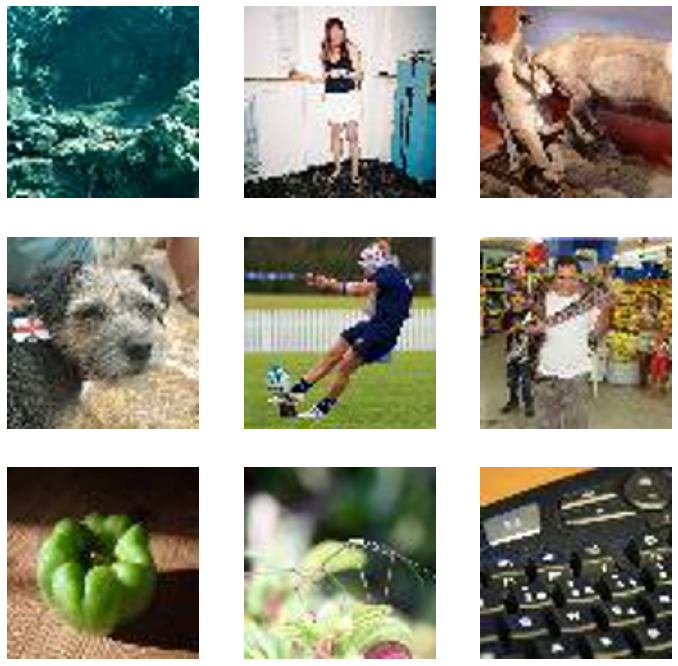

In [6]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.imshow(x[i])
    ax.axis('off')
    
# display the figure
plt.show()

In [7]:
# Convert each image to 1d array (28x28 -> 784x1)
x = x.reshape(len(x), -1)
print(x.shape)

(10000, 67500)


In [8]:
# Normalize the data to 0 - 1
x = x.astype(np.float32) / 255.

In [9]:
from sklearn.cluster import MiniBatchKMeans

n_digits = 100


In [10]:
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(x)

MiniBatchKMeans(n_clusters=100)

In [11]:
kmeans.labels_

array([74, 40, 58, ..., 65,  0, 86], dtype=int32)

In [12]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    # Loop through the clusters
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [13]:

y = kmeans.predict(x)

print(y[:20])


[74 40 58 97 91 53  6 45  8 87 31 22  3 34 36  8 70 37  5 15]


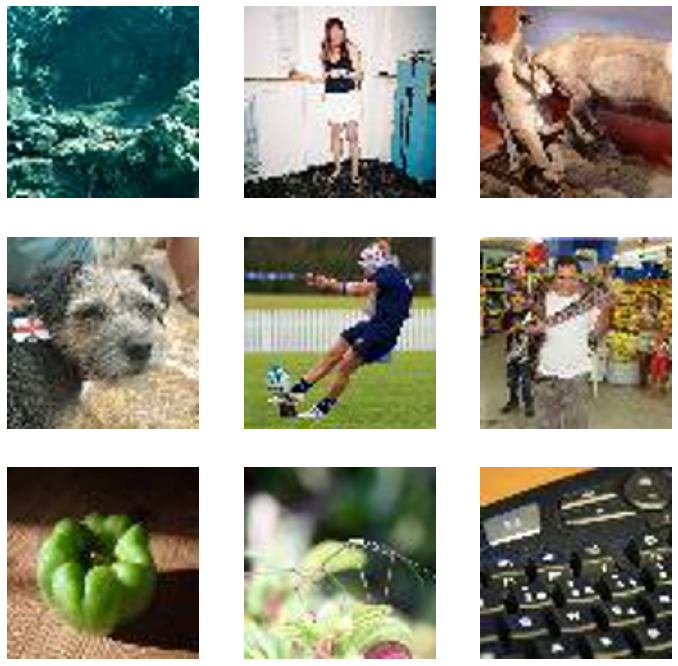

In [14]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.imshow(X_test[i])
    ax.axis('off')
    
# display the figure
plt.show()